In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Train.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/Train.csv'
/content


In [3]:
!ls

DataForML.pkl  drive  Final_XGB_Model.pkl  sample_data


***STEP 1***
*   Connecting pathway to csv file (Google Drive
*   Removing duplicate rows



In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading dataset
import pandas as pd
import numpy as np
EcommerceData = pd.read_csv('/content/drive/MyDrive/Train.csv', encoding="latin")
print('Shape before deleting duplicate values:',  EcommerceData.shape)

#Removing duplicate rows if any exists
EcommerceData=EcommerceData.drop_duplicates()
print('Shape After deleting duplicate values', EcommerceData.shape)

#printing Sample Data
#Start Observing the Quantitative/Categorical/Qualitative variables
EcommerceData.head(10)

Shape before deleting duplicate values: (2452, 8)
Shape After deleting duplicate values (2452, 8)


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470
5,P-5597,B-1487,home decor festive needs,table decor handicrafts,showpieces,5.0,9/4/2020,746
6,P-8398,B-3078,footwear,women s footwear,casual shoes,4.1,4/12/2017,1798
7,P-10744,B-2830,kitchen dining,cookware,pots pans,3.1,1/12/2013,955
8,P-4042,B-1045,home decor festive needs,wall decor clocks,paintings,2.4,18/3/2019,21770
9,P-360,B-88,automotive,accessories spare parts,car interior exterior,2.3,10/5/2018,199


Observation Above : There are 2452 Ecommerce Price Predictions

Removing the object variables

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#List of all columns to remove
columns_to_remove = ['Product','Product_Brand','Item_Category','Subcategory_1','Subcategory_2','Date']

#Check existence of the columns
for col in columns_to_remove:
  if col in EcommerceData.columns:
    EcommerceData = EcommerceData.drop(columns=col)
    print(f"Removed column: {col}")
  else:
    print(f"Column not found in the DataFrame: {col}")

  #View data frame after attempt to drop columns
  print(EcommerceData.head())

Removed column: Product
  Product_Brand             Item_Category     Subcategory_1  \
0         B-659        bags wallets belts              bags   
1        B-3078                  clothing  women s clothing   
2        B-1810  home decor festive needs        showpieces   
3        B-3078  beauty and personal care          eye care   
4        B-3078                  clothing    men s clothing   

       Subcategory_2  Item_Rating        Date  Selling_Price  
0          hand bags          4.3    2/3/2017            291  
1       western wear          3.1    7/1/2015            897  
2             ethnic          3.5   1/12/2019            792  
3  h2o plus eye care          4.0  12/12/2014            837  
4           t shirts          4.3  12/12/2013            470  
Removed column: Product_Brand
              Item_Category     Subcategory_1      Subcategory_2  Item_Rating  \
0        bags wallets belts              bags          hand bags          4.3   
1                  clothing

**STEP 4**

<Axes: >

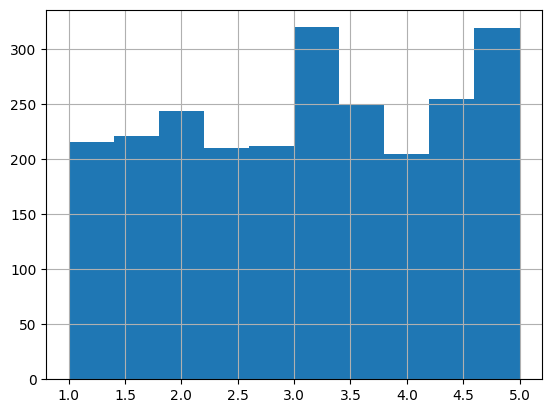

In [7]:
%matplotlib inline
EcommerceData['Item_Rating'].hist()

**STEP 5**

In [8]:
EcommerceData.head()

,Item_Rating,Selling_Price
0,4.3,291
1,3.1,897
2,3.5,792
3,4.0,837
4,4.3,470


In [9]:
EcommerceData.tail()

,Item_Rating,Selling_Price
2447,2.3,741
2448,1.9,1590
2449,1.9,995
2450,2.7,1598
2451,4.1,397


In [10]:
EcommerceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item_Rating    2452 non-null   float64
 1   Selling_Price  2452 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 38.4 KB


In [11]:
EcommerceData.describe(include='all')

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,2494.375612
std,1.187137,7115.256516
min,1.000000,33.000000
25%,2.000000,371.000000
50%,3.100000,596.000000
75%,4.100000,1195.250000
max,5.000000,116289.000000


In [12]:
EcommerceData.nunique()

,0
Item_Rating,41
Selling_Price,1095


**STEP 8**

In [13]:
def PlotBarCharts(inpData, colsPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsPlot), figsize=(16,4))
    fig.suptitle('Bar Charts of: '+ str(colsPlot))

    for colName, plotNumber in zip(colsPlot, range(len(colsPlot))):
        if colName in inpData.columns:  # Check if column exists in DataFrame
            inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])
        else:
            print(f"Column '{colName}' not found in DataFrame. Skipping.")

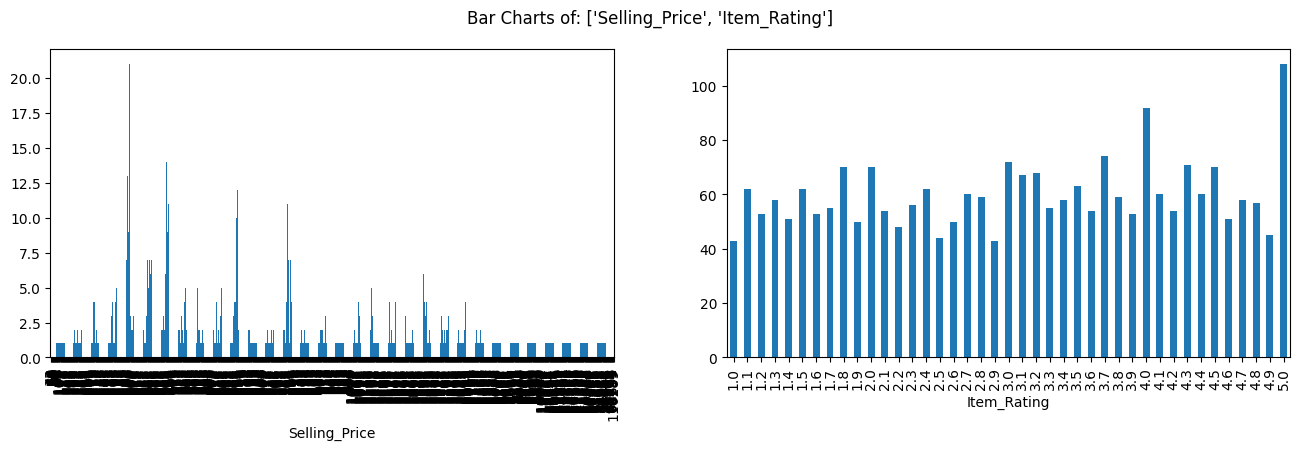

In [14]:
PlotBarCharts(inpData=EcommerceData, colsPlot=['Selling_Price','Item_Rating']) # Use 'colsPlot' to match the function definition


**STEP 9**

array([[<Axes: title={'center': 'Item_Rating'}>,
        <Axes: title={'center': 'Selling_Price'}>]], dtype=object)

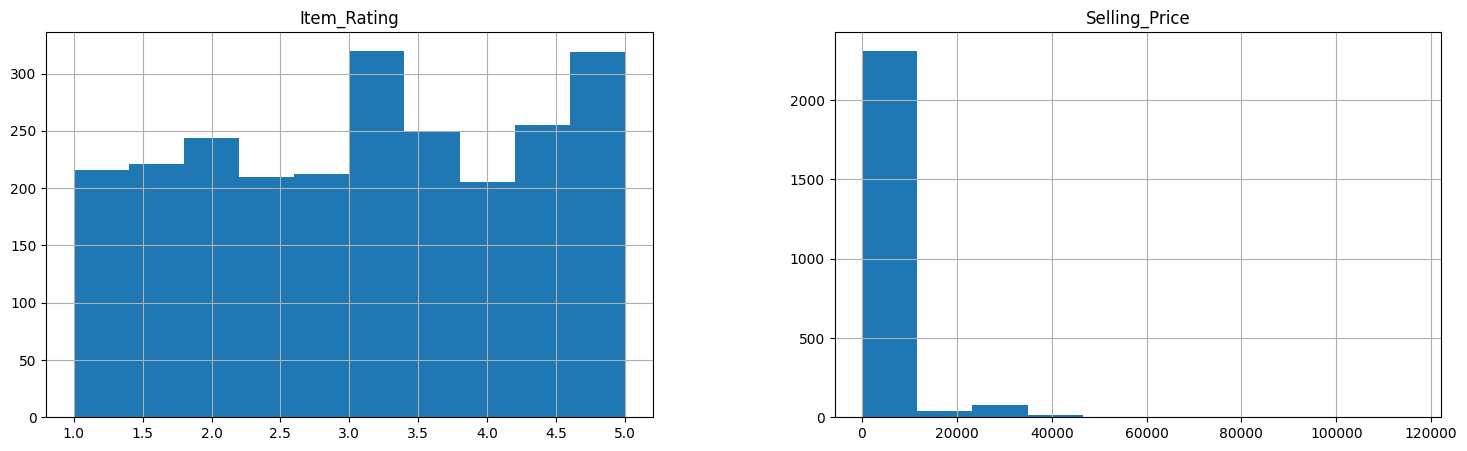

In [15]:
EcommerceData.hist(['Item_Rating','Selling_Price'], figsize=(18,5))

**STEP 10**

In [16]:
EcommerceData['Selling_Price'][EcommerceData['Selling_Price']<60].sort_values(ascending=False)

,Selling_Price
1788,42
1950,33


In [17]:
EcommerceData['Selling_Price'][EcommerceData['Selling_Price']<60] = 51.13

**STEP 11**

array([[<Axes: title={'center': 'Selling_Price'}>]], dtype=object)

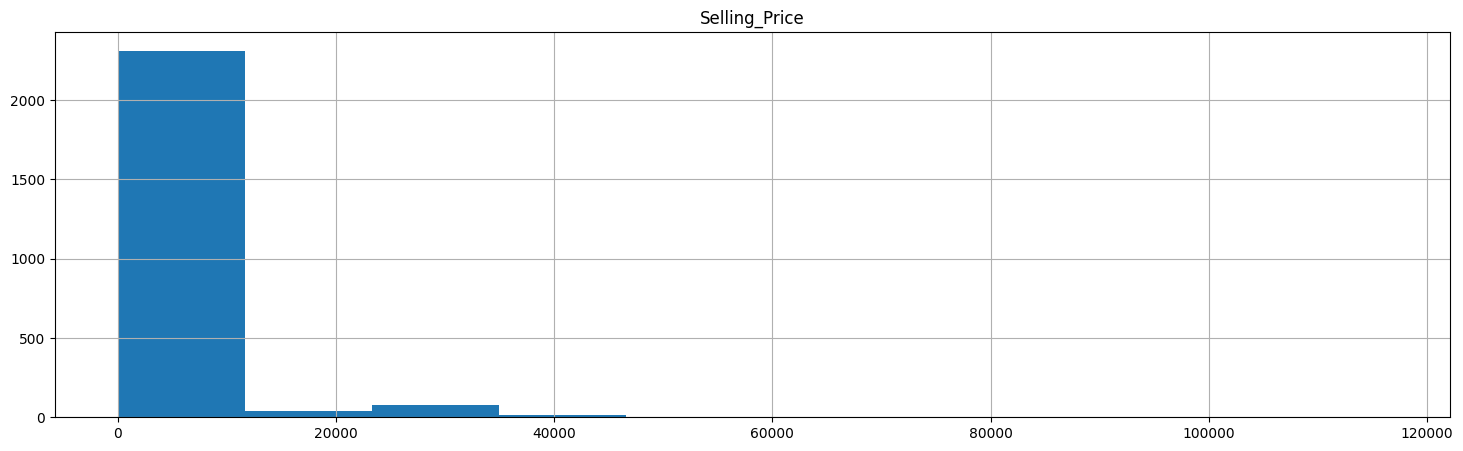

In [18]:
EcommerceData.hist(['Selling_Price'], figsize=(18,5))

**STEP 12**

In [19]:
EcommerceData.isnull().sum()

,0
Item_Rating,0
Selling_Price,0


**STEP 13**

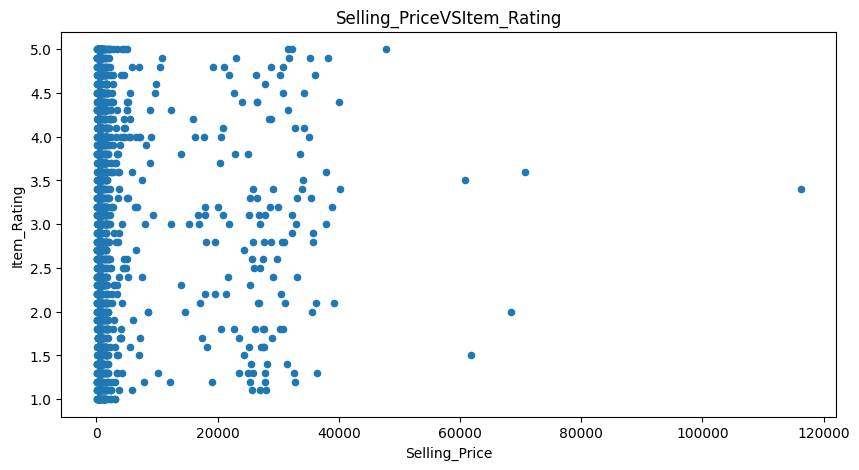

In [20]:
ContinuousCols = ['Selling_Price']

#Plotting Scatter Charts for each predictor vs the target variable
for predictor in ContinuousCols:
  EcommerceData.plot.scatter(x=predictor, y='Item_Rating', figsize=(10,5), title=predictor+"VS"+'Item_Rating')

**STEP 14**

In [21]:
#Calculating Correlation Matrix
ContinuousCols=['Item_Rating','Selling_Price'] # Only include numeric columns

#Creating the Correlation Matrix
CorrelationData=EcommerceData[ContinuousCols].corr()
CorrelationData

,Item_Rating,Selling_Price
Item_Rating,1.000000,-0.013686
Selling_Price,-0.013686,1.000000


In [22]:
CorrelationData['Item_Rating'][abs(CorrelationData['Item_Rating'])>0.5]

,Item_Rating
Item_Rating,1.0


** STEP 15**

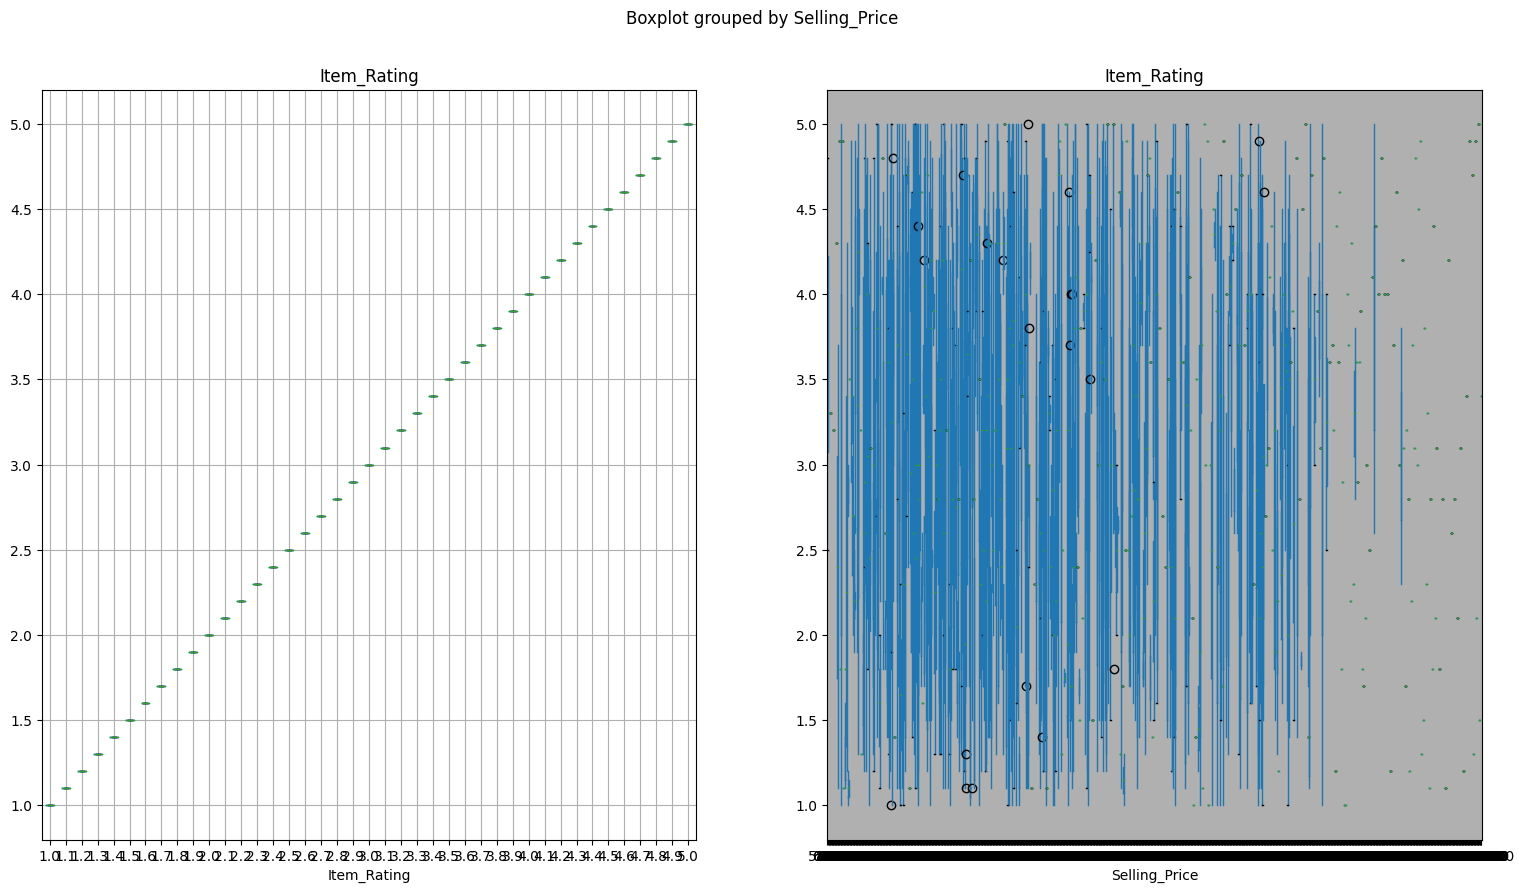

In [23]:
CatrgoricalCols=['Item_Rating','Selling_Price']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CatrgoricalCols), figsize=(18,10)) # Use CatrgoricalCols

#Creating box plots for each continuous predictor against the Target variable "Item_Rating"
for PredictorCol , i in zip(CatrgoricalCols, range(len(CatrgoricalCols))):
  EcommerceData.boxplot(column='Item_Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i]) # Correct typo: colimn -> column

**STEP 16**

In [24]:
def FunctionAnova (inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

# Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### ‡ \n')
  for predictor in CategoricalPredictorList:
    # Check if the predictor column exists in the DataFrame
    if predictor in inpData.columns:
        CategoryGroupLists=inpData.groupby(predictor) [TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject HO
        if (AnovaResults [1] < 0.05):
          print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults [1])
          SelectedPredictors. append (predictor)
        else:
          print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults [1])
    else:
        print(f"Skipping predictor '{predictor}' as it is not present in the DataFrame.")

  return (SelectedPredictors)

CategoricalPredictorList=['Product','Selling_Price']
FunctionAnova(inpData=EcommerceData,
               TargetVariable='Item_Rating', CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### ‡ 

Skipping predictor 'Product' as it is not present in the DataFrame.
Selling_Price is NOT correlated with Item_Rating | P-Value: 0.8437906633097767


[]

In [25]:
SelectedColumns=['Item_Rating', 'Selling_Price']
# Selecting final columns
DataForML=EcommerceData[SelectedColumns]
DataForML. head ()

,Item_Rating,Selling_Price
0,4.3,291.0
1,3.1,897.0
2,3.5,792.0
3,4.0,837.0
4,4.3,470.0


In [26]:
DataForML.to_pickle( 'DataForML.pkl')

**STEP 17**

In [27]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies (DataForML)

# Adding Target Variable to the data
DataForML_Numeric ['Item_Rating']=EcommerceData['Item_Rating']

# Printing sample rows
DataForML_Numeric.head ()

,Item_Rating,Selling_Price
0,4.3,291.0
1,3.1,897.0
2,3.5,792.0
3,4.0,837.0
4,4.3,470.0


**STEP 18**

In [28]:
DataForML_Numeric.columns

Index(['Item_Rating', 'Selling_Price'], dtype='object')

In [29]:
TargetVariable='Item_Rating'
Predictors=['Item_Rating','Selling_Price'] # Removed 'datetime'

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

**STEP 19**

In [30]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform (X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1716, 2)
(1716,)
(736, 2)
(736,)


**STEP 20**

Multilinear Regression

In [32]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print (RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:' ,metrics.r2_score(y_train, LREG.predict(X_train)))

#####################################################
print('\n##### Model Validation and Accuracy Calculations ############')

#Printing some sample values of prediction
TestingDataResults=pd. DataFrame(data=X_test, columns=Predictors)
TestingDataResults [TargetVariable]=y_test
TestingDataResults [('Predicted'+TargetVariable)]=np. round (prediction) # Correct column name for predicted ratings

# Printing sample prediction values
print (TestingDataResults. head())

# Calculating the error for each row
TestingDataResults ['Selling_Price']=100 * ((abs(
 TestingDataResults ['Item_Rating']-TestingDataResults ['Predicted'+ TargetVariable] ))/TestingDataResults['Item_Rating']) # Use the correct column name

MAPE=np.mean(TestingDataResults ['Selling_Price' ]) # Assuming 'low' was a typo and should be 'Selling_Price'
MedianMAPE=np. median (TestingDataResults ['Selling_Price']) # Assuming 'low' was a typo and should be 'Selling_Price'

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
  MAPE = np.mean (100 * (np. abs (orig-pred)/orig))
  #print ('#'*70, 'Accuracy:', 100-MAPE)
  return (100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer (Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ############
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2          4.5       0.293956                   5.0
3          1.1       0.001806                   1.0
4          1.7       0.006881                   2.0
Mean Accuracy on test data: 90.66324889798534
Median Accuracy on test data: 91.30434782608695

Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


Decision Tree Regression

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value:  0.999277420777931

##### Model Validation and Accuracy Calculations ############
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2          4.5       0.293956                   4.0
3          1.1       0.001806                   1.0
4          1.7       0.006881                   2.0
Mean Accuracy on test data: 90.66324889798534
Median Accuracy on test data: 91.30434782608695

Accuracy values for 10-fold Cross Validation: 
 [nan nan nan nan nan nan nan nan nan nan]
InFinal Average Accuracy of the model: nan


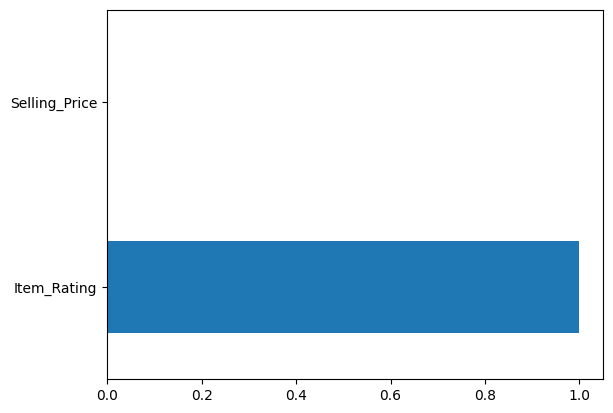

In [33]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor (max_depth=5, criterion='friedman_mse') # Removed the extra space before 'friedman_mse'
# Good Range of Max_ depth = 2 to 20

# Printing all the parameters of Decision Tree
print (RegModel)

# Creating the model on Training Data
DT=RegModel. fit (X_train,y_train)
prediction=DT. predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value: ',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series (DT. feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
######################################################################################
print('\n##### Model Validation and Accuracy Calculations ############')

# Printing some sample values of prediction
TestingDataResults=pd. DataFrame(data=X_test, columns=Predictors)
TestingDataResults [TargetVariable]=y_test
TestingDataResults [('Predicted'+TargetVariable)]=np. round (prediction)

#Printing sample prediction values
print(TestingDataResults. head ())

# Calculating the error for each row
TestingDataResults['Selling_Price'] = 100 * ( (abs(
 TestingDataResults['Item_Rating'] - TestingDataResults['Predicted' + TargetVariable]))/TestingDataResults['Item_Rating']) # Use the correct column name 'PredictedItem_Rating'

MAPE = np.mean(TestingDataResults['Selling_Price'])
MedianMAPE=np. median (TestingDataResults ['Selling_Price'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print ('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print( 'Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean (100 * (np-abs (orig-pred)/orig))
  #print ('#**70, 'Accuracy:', 100-MAPE)
  return ( 100-МАРЕ)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/tes
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values)
print('InFinal Average Accuracy of the model:', round(Accuracy_Values.mean (), 2))


Plotting Decision Tree

In [36]:
# Load libraries
from IPython.display import Image
# Import sklearn here
import sklearn
from sklearn import tree
import pydotplus
# Import the ensemble module explicitly
from sklearn import ensemble

# Ensure 'RegModel' is a RandomForestRegressor before proceeding
# Use sklearn.ensemble here instead of just sklearn
if isinstance(RegModel, ensemble.RandomForestRegressor): # Use ensemble here
    # Access the first tree in the forest as an example
    tree_to_visualize = RegModel.estimators_[0]

    # Create DOT data for the selected tree
    dot_data = tree.export_graphviz(tree_to_visualize, out_file=None,
                                    feature_names=Predictors)

    # printing the rules
    #print(dot_data)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Show graph
    Image(graph.create_png(), width=10000,height=5000)
    # Double-click on the graph to zoom in
else:
    print("Error: RegModel is not a RandomForestRegressor. Visualization skipped.")

Error: RegModel is not a RandomForestRegressor. Visualization skipped.


Random Forest Regression

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9990687030437887

##### Model Validation and Accuracy Calculations ##########
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2          4.5       0.293956                   4.0
3          1.1       0.001806                   1.0
4          1.7       0.006881                   2.0
Mean Accuracy on test data: 90.66324889798534
Median Accuracy on test data: 91.30434782608695

Accuracy values for 10-fold Cross Validation:
 [97.95079881 98.84208727 98.81883342 98.6043417  98.40321514 98.77406117
 98.00670342 98.61799918 98.29693688 98.7357674 ]

Final Average Accuracy of the model: 98.51


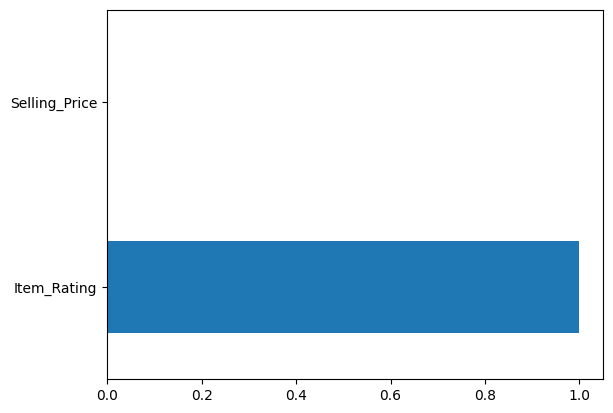

In [37]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
# Use the correct column names from the TargetVariable
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['Predicted' + TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting one of decision tree in Random Forest Regression

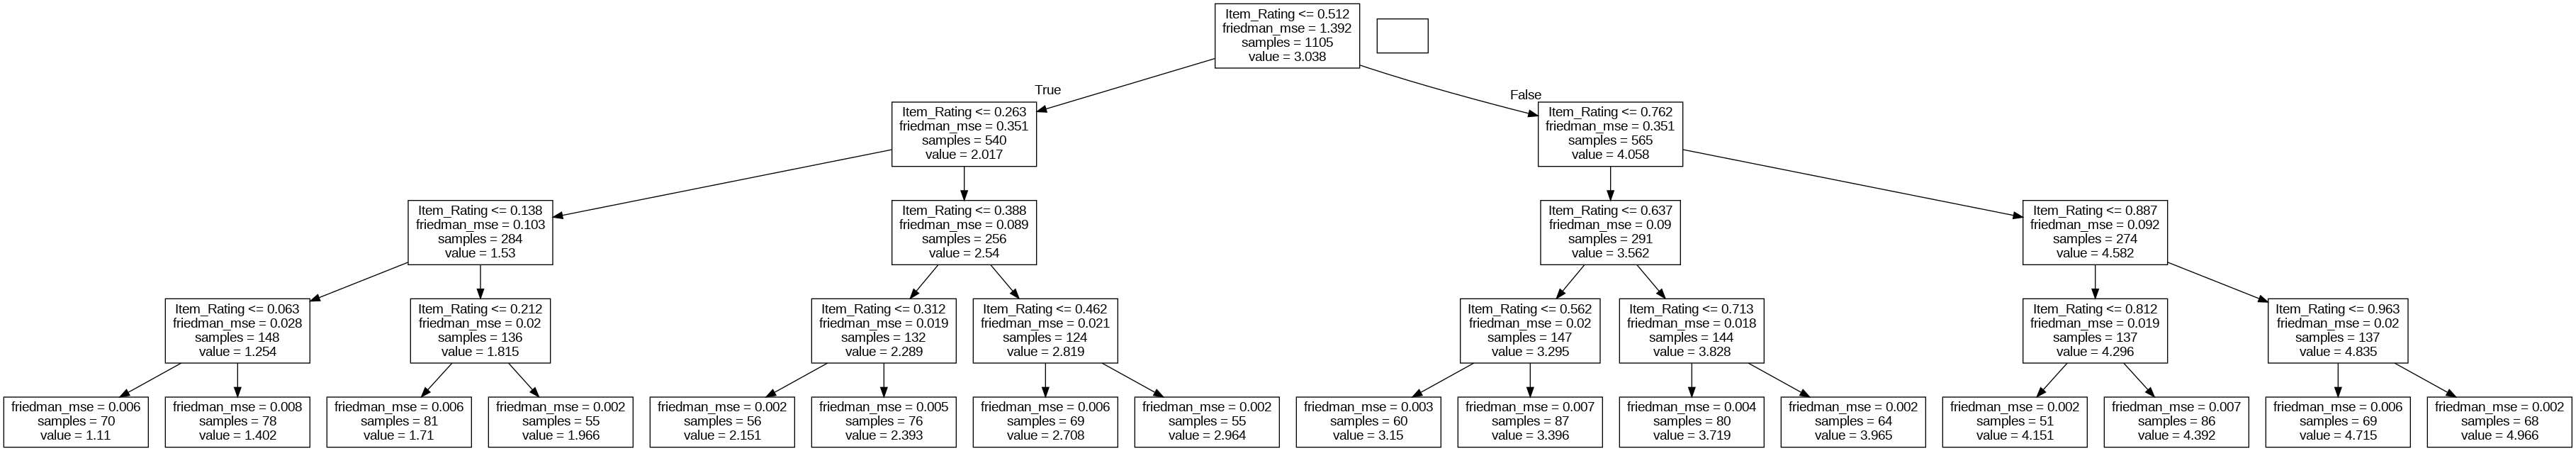

In [38]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
# Remove class_names as it's not applicable for Regression problems
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=3000,height=1000)
# Double click on the graph to zoom in

**Step 21**

AdaBoost Algorithm

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9857601279738215

##### Model Validation and Accuracy Calculations ##########
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2          4.5       0.293956                   4.0
3          1.1       0.001806                   1.0
4          1.7       0.006881                   2.0
Mean Accuracy on test data: 90.66324889798534
Median Accuracy on test data: 91.30434782608695

Accuracy values for 10-fold Cross Validation:
 [94.38971833 95.49796108 94.63820477 94.89597801 95.19920678 95.31778595
 94.46664257 94.80794614 94.98814044 95.07609336]

Final Average Accuracy of the model: 94.93


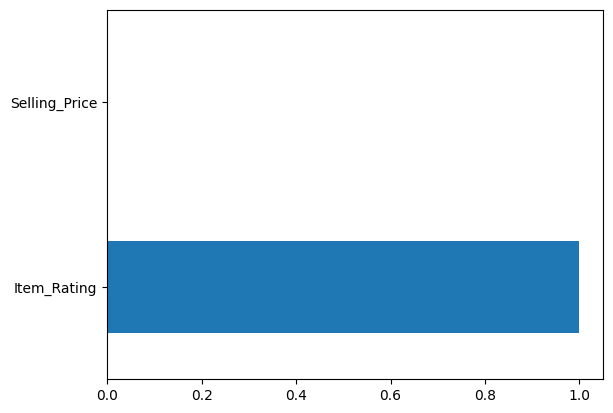

In [39]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['Predicted' + TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XG Boost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9999999379310271

##### Model Validation and Accuracy Calculations ##########
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2 

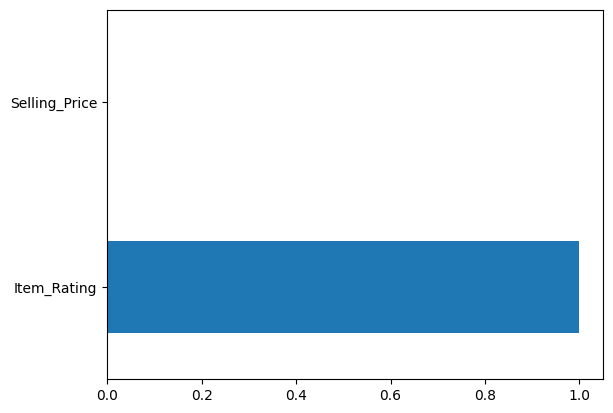

In [40]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['Predicted' + TargetVariable]))/TestingDataResults[TargetVariable])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting single Decision Tree out of XG Boost

<Axes: >

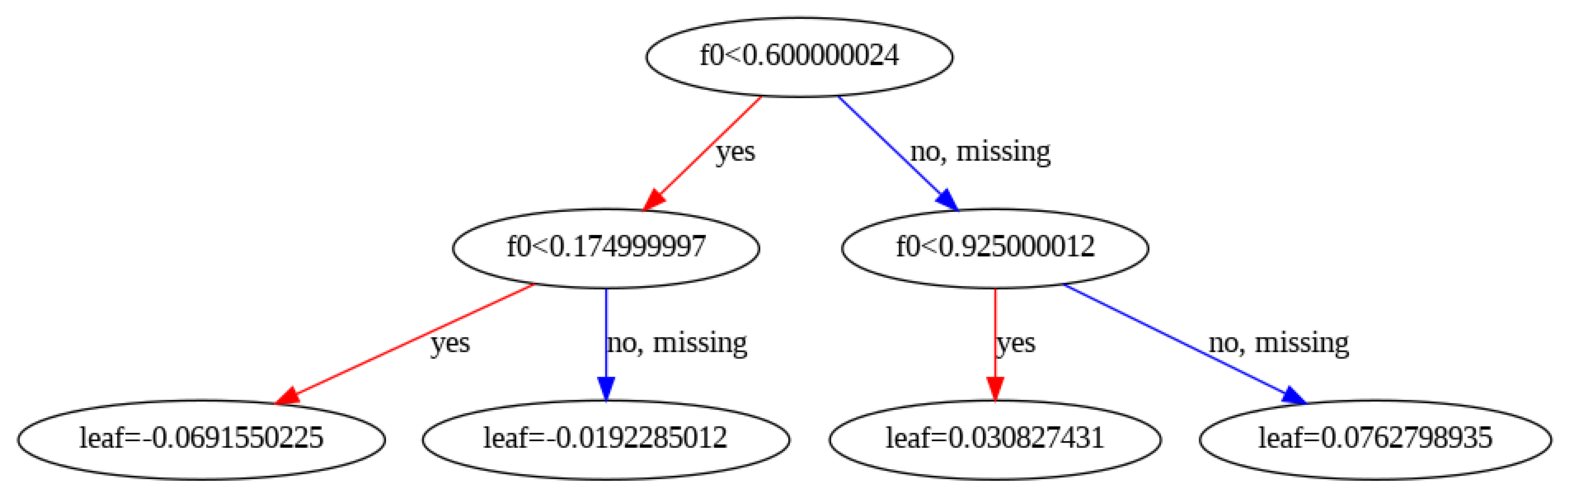

In [41]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

K-Nearest Neighbor(KNN)

In [42]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['Predicted' + TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9999089175502753

##### Model Validation and Accuracy Calculations ##########
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2          4.5       0.293956                   5.0
3          1.1       0.001806                   1.0
4          1.7       0.006881                   2.0
Mean Accuracy on test data: 90.66324889798534
Median Accuracy on test data: 91.30434782608695

Accuracy values for 10-fold Cross Validation:
 [99.74647244 99.85940599 99.90990411 99.83739468 99.90529663 99.9312526
 99.93367127 99.92445448 99.89414247 99.84828355]

Final Average Accuracy of the model: 99.88


Support Vector Machine (SVM) Regressor

In [43]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['Predicted' + TargetVariable]))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9975753755843485

##### Model Validation and Accuracy Calculations ##########
   Item_Rating  Selling_Price  PredictedItem_Rating
0          1.2       0.005531                   1.0
1          4.9       0.003784                   5.0
2          4.5       0.293956                   4.0
3          1.1       0.001806                   1.0
4          1.7       0.006881                   2.0
Mean Accuracy on test data: 90.66324889798534
Median Accuracy on test data: 91.30434782608695

Accuracy values for 10-fold Cross Validation:
 [97.5112176  97.99082655 97.9923486  97.87370383 97.94091817 97.99333807
 97.47018289 97.82214203 97.89073368 97.84767878]

Final Average Accuracy of the model: 97.83


**STEP 21**

Model Deployment

In [44]:
# Separate Target Variable and Predictor Variables
TargetVariable='Item_Rating'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Selling_Price']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(2452, 1)
(2452,)


Cross Validation

In [45]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [47.85892455 56.39302407 56.21418827 56.0352065  56.18893321 55.43157763
 45.40816829 54.36641636 54.64114095 55.84435462]

Final Average Accuracy of the model: 53.84


**STEP 22**

Retraining Model using 100% data

In [46]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

**STEP 23**

Saving Model as Serialized file

In [47]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


**STEP 24**

Creating Python Function

In [48]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Selling_Price']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

**STEP 25**

Calling Function for new data

In [49]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[3.85],[4.99]],columns=['Selling_Price'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Selling_Price
0           3.85
1           4.99


,Prediction
0,3.111403
1,3.111403


Functions for API Predictions

In [50]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Selling_Price):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Selling_Price]],
     columns=['Selling_Price'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_Selling_Price=4.98,
                             )

'{"Prediction":{"0":3.1114025116}}'

WEB DEPLOYMENT using Flash Library

Install Flash Library

In [51]:
!pip install flask

Create Flash API

In [52]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [53]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Selling_Price_value = float(request.args.get('Selling_Price'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Selling_Price=Selling_Price_value,
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

Start API Engine

In [54]:
 import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


**GUI CODE**

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class HousePricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Ecommerce Data Prediction')
        self.data = pd.read_csv('Train.csv')
        self.sliders = []

        self.X = self.data.drop('Item_Rating', axis=1).values
        self.y = self.data['Item_Rating'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted house price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = HousePricePredictionApp(root)
    root.mainloop()
